In [1]:
'''Code to plot EDS spectra anaylsis from a master .csv or .txt directory
Code by Scott Gleason, University of New South Wales (UNSW), Australia 
S.Gleason@student.unsw.edu.au, April 2015'''

'''Future Devlopment - Make a derivative and intergration of the dataMatrix,
and plot all 3 Matrixs in a row for each file (see SoftwareCap). 
This will be for plotting DSC / SMG data'''

'Future Devlopment - Make a derivative and intergration of the dataMatrix,\nand plot all 3 Matrixs in a row for each file (see SoftwareCap). \nThis will be for plotting DSC / SMG data'

In [2]:
'''Imports numpy, matplotlib, and glob libaries 
numpy & matplotlib allow for complex math
glob allows for pattern matching with * and ? wild cards
    (note glob's only function is glob (i.e. glob.glob('search critrea')))'''

%matplotlib inline
'Generates plots inline of the notebook. Commit out if want indivudual files'

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator #Used for minor axis ticks
import glob

In [3]:
cd 'C:\\Users\\z3492622\\Documents\\PhD Project\\Results'

C:\Users\z3492622\Documents\PhD Project\Results


In [4]:
cd 'SEM\\2015-04-14 (T1 2 3 5)\\'

C:\Users\z3492622\Documents\PhD Project\Results\SEM\2015-04-14 (T1 2 3 5)


In [5]:
'Directs to directory containing files to be anaylised'

Folder = 'EDS Spectra Sheets'

print 'Directory to be anaylised:'
print Folder

Directory to be anaylised:
EDS Spectra Sheets


In [6]:
def dataFilesRange(FileType, StartFile = 0, EndFile = None):
    '''Preforms a glob list of *.filetype within directory
    FileType = csv, txt, etc
    StartFile = Number of first file to be anaylsis from the glob
        Defaulted to 0
    EndFile = Number of last file to be anaylsis from the glob
        Defaulted to None, as to return last value'''
    
    'assertion test for the function'
    assert StartFile > -1, 'First file must be atleast 0'
    if EndFile<>None:
        assert EndFile > 0, 'Last file must be atleast 1'

    dataFiles = glob.glob(Folder + '\\*.'+ FileType)

    'set range of files to be analysed'
    Range = dataFiles[StartFile:EndFile]

    return Range

In [7]:
def dataArray(filename, Delimiter = ',', StartRow = 1, LastColumn = None):
    '''Creates an array from an input file, and defines limits of the array
    filename = file to anaylisied
    Delimiter = data separator (defaulted to ',' for .csv)
    StartRow = row data starts on (defaulted to 1)
    LastColumn = column data ends on (defaulted to None)
    Note: .txt use 'None' as Delimiter'''
    
    assert StartRow > 0, 'First row must be atleast 1'
    
    '''If condition determining the last column of the array
    also contains assertion to ensure last column is valid'''
    if LastColumn<>None:
        assert LastColumn > 0, 'Last column must be atleast 1'
        Column = range(0, LastColumn, 1)

    'Returns array of data, do not edit this string'
    return np.loadtxt(filename, delimiter = Delimiter,
                      skiprows = StartRow - 1, 
                      usecols = Column)

In [8]:
def plotFile(filename, xAxis=1, yAxis=2):
    '''Generates a plot of data from a file, and formates chart layout
    filename = file to anaylisied
    xAxis = Column of X-Axis Data (defaulted to 1st column)
    yAxis = Column of Y-Axis Data (defaulted to 2nd column)'''
    
    'Assertion to ensure x and y axis are valid'
    assert xAxis > 0, 'X Axis must be at least 1'
    assert yAxis > 0, 'Y Axis must be at least 1'
    
    'Defines the columns X & Y axis data come from in filename array'
    xAxisData = filename[:, xAxis-1]
    yAxisData = filename[:, yAxis-1]

    'Define Plot layout, axis lables, legends, etc'
    PlotLayout = {'fileName': 'Spectra Counts', # Plot filename 
                  'title': 'Counts / $keV$', # Title lable
                  'titleFontSize': 20, # Title lable font size
                  'X-Lable': '$keV$', # X axis lable
                  'Y-Lable': 'Counts', # Y axis lable
                  'axisFontSize': 16, # X & Y axis lable font size
                  'xAxisMax': 20, # upper scale limit for X axis
                  'yAxisMax': 8000, # upper scale limit for y axis
                  'lineColourType': 'k', # line colour and style
                  'lineWeight': 0.8 # weight of line
                  }
    
    'Add PlotLayout objects to plot'
    plt.figure(PlotLayout['fileName'])
    plt.title(PlotLayout['title'], fontsize = PlotLayout['titleFontSize'])
    plt.xlabel(PlotLayout['X-Lable'], fontsize = PlotLayout['axisFontSize'])
    plt.ylabel(PlotLayout['Y-Lable'], fontsize = PlotLayout['axisFontSize'])
    
    'Add annotations to the plot'
    PlotAnnotate = [
        {'label': 'Mg', 'xPos': 1.253, 'yPos': 4000, 'colour': 'g'},
        {'label': 'Ca', 'xPos': 0.341, 'yPos': 3000, 'colour': 'c'},
        {'label': 'Ca', 'xPos': 3.690, 'yPos': 3000, 'colour': 'c'},
        {'label': 'Zn', 'xPos': 1.012, 'yPos': 7500, 'colour': 'm'},
        {'label': 'Zn', 'xPos': 8.630, 'yPos': 2000, 'colour': 'm'},
        {'label': '', 'xPos': 1.302, 'yPos': 500, 'colour': 'g'},
        {'label': '', 'xPos': 4.012, 'yPos': 500, 'colour': 'c'},
        {'label': '', 'xPos': 0.345, 'yPos': 500, 'colour': 'c'},
        {'label': '', 'xPos': 9.570, 'yPos': 500, 'colour': 'm'},
        {'label': '', 'xPos': 1.043, 'yPos': 500, 'colour': 'm'}]
    
    for i in PlotAnnotate:
        plt.annotate(i['label'], xy=(i['xPos'], 0),
                     xytext=(i['xPos'], i['yPos']),
                     arrowprops=dict(arrowstyle="-", linewidth = 0.4,
                                     color=i['colour']),
                     horizontalalignment='center')
    
    'Turns on minor axis ticks'
    #plt.minorticks_on()
    ax = plt.subplot(1, 1, 1)
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    
    'Generates the plot'
    plt.plot(xAxisData, yAxisData,
             PlotLayout['lineColourType'], 
             linewidth = PlotLayout['lineWeight'])
    plt.axis([0, PlotLayout['xAxisMax'], 0, PlotLayout['yAxisMax']])
    plt.show()

In [9]:
filesToPlot = dataFilesRange('txt', 0, 5)
print filesToPlot

['EDS Spectra Sheets\\T1_F1_Spec.txt', 'EDS Spectra Sheets\\T1_F2_Spec.txt', 'EDS Spectra Sheets\\T1_F3_Spec.txt', 'EDS Spectra Sheets\\T1_F4_Spec.txt', 'EDS Spectra Sheets\\T1_F5_Spec.txt']


In [10]:
def PlotFilesLoop():
    '''For loop to print dataFileRange
    Prints filepath of each *.filetype file anaylisied 
    Uses dataArray() function to print matrix of each file
    Uses dataArray() and plotFile() functions to plot each file'''
    
    for files in filesToPlot:
        print files #Prints files

        '''dataArray takes 4 arrguments; filename, Delimiter, StartRow, and LastColumn
        Note1: For .csv Delimiter = ',' and for .txt Delimiter = None'''
        dataToPlot = dataArray(files, None, 26, 2) #Defines data and limits
        print dataToPlot #Prints matrix
        'plotfile requires the X & Y axis be specified'
        plotFile(dataToPlot, 1, 2) #Generates plot

EDS Spectra Sheets\T1_F1_Spec.txt
[[ -0.4758   0.    ]
 [ -0.4708   0.    ]
 [ -0.4658   0.    ]
 ..., 
 [ 19.9872   0.    ]
 [ 19.9922   0.    ]
 [ 19.9972   0.    ]]


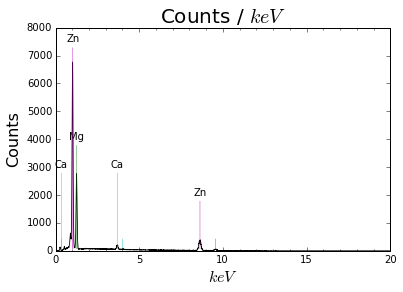

EDS Spectra Sheets\T1_F2_Spec.txt
[[ -0.4758   0.    ]
 [ -0.4708   0.    ]
 [ -0.4658   0.    ]
 ..., 
 [ 19.9872   0.    ]
 [ 19.9922   0.    ]
 [ 19.9972   0.    ]]


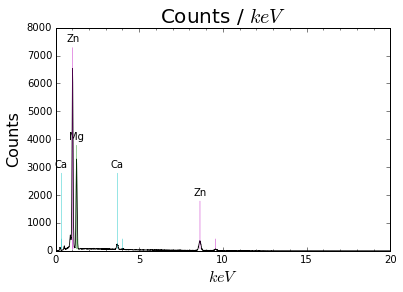

EDS Spectra Sheets\T1_F3_Spec.txt
[[ -0.4758   0.    ]
 [ -0.4708   0.    ]
 [ -0.4658   0.    ]
 ..., 
 [ 19.9872   0.    ]
 [ 19.9922   0.    ]
 [ 19.9972   0.    ]]


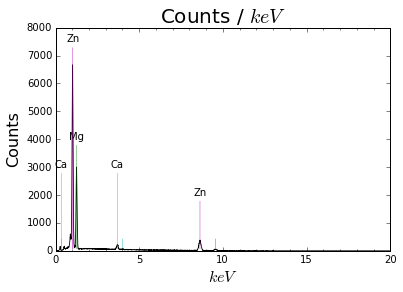

EDS Spectra Sheets\T1_F4_Spec.txt
[[ -0.4758   0.    ]
 [ -0.4708   0.    ]
 [ -0.4658   0.    ]
 ..., 
 [ 19.9872   0.    ]
 [ 19.9922   0.    ]
 [ 19.9972   0.    ]]


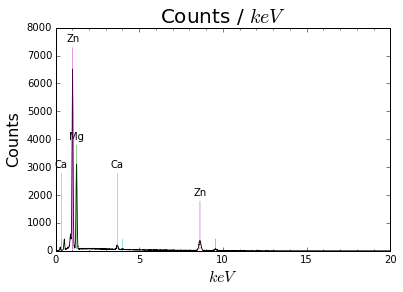

EDS Spectra Sheets\T1_F5_Spec.txt
[[ -0.4758   0.    ]
 [ -0.4708   0.    ]
 [ -0.4658   0.    ]
 ..., 
 [ 19.9872   0.    ]
 [ 19.9922   0.    ]
 [ 19.9972   0.    ]]


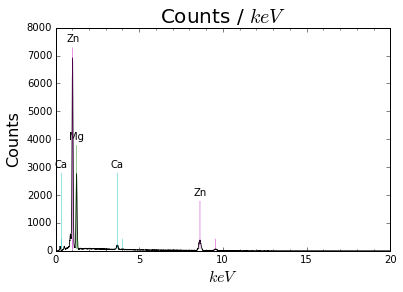

In [11]:
PlotFilesLoop()